## Pregunta: V4 - Análisis de correlación entre el tamaño de las versiones de la distribución Ubuntu 

### 1. Importaciones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Lectura

In [15]:
df = pd.read_csv("../../datawarehouse/processed-ubuntu-packages.csv")

### 3. Preprocesado

In [16]:
# Seleccionar las columnas de interés
cols = ['Distro-Version', 'Size', 'Installed-Size']

# Crear un nuevo dataframe con solo las columnas seleccionadas
df_selected = df[cols]

,Distro-Version,Distro-Year,Package,Description,Section,Version,Architecture,Priority,Essential,Build-Essential,...,Original-Maintainer,Size,Installed-Size,Depends,Pre-Depends,Recommends,Conflicts,Suggests,Replaces,Provides
0,18.04 - bionic,2018,acct,Description,admin,6.6.4-1,amd64,optional,no,no,...,Debian,87216.0,297.0,"libc6 (>= 2.14), lsb-base",NaN,NaN,NaN,NaN,NaN,NaN
1,18.04 - bionic,2018,acl,Description,utils,2.2.52-3build1,amd64,optional,no,no,...,Anibal,38504.0,200.0,"libacl1 (= 2.2.52-3build1), libc6 (>= 2.14)",NaN,NaN,NaN,NaN,NaN,NaN
2,18.04 - bionic,2018,acpi-support,Description,admin,0.142,amd64,optional,no,no,...,Bart,10196.0,92.0,acpid (>= 1.0.4-1ubuntu4),NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
3,18.04 - bionic,2018,acpid,Description,admin,1:2.0.28-1ubuntu1,amd64,optional,no,no,...,Debian,36518.0,139.0,"libc6 (>= 2.15), init-system-helpers (>= 1.18~...",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),NaN,NaN,NaN
4,18.04 - bionic,2018,adduser,Description,admin,3.116ubuntu1,all,important,no,yes,...,Debian,162684.0,624.0,"passwd, debconf (>= 0.5) | debconf-2.0",NaN,"toshset, wireless-tools",uswsusp (<= 0.2),"liblocale-gettext-perl, perl, ecryptfs-utils (...",NaN,NaN


### 4. Cálculos

Correlaciones fuertes:
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlación]
Index: []
Correlaciones débiles:
       Variable 1      Variable 2  Correlación
0            Size  Installed-Size         0.43
1  Installed-Size            Size         0.43


C:\Users\diego\AppData\Local\Temp\ipykernel_13648\2082004414.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_selected.corr()


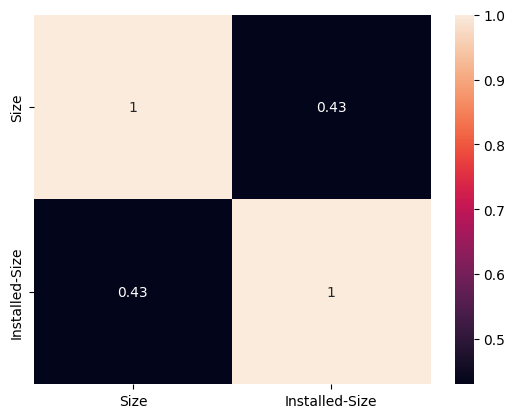

In [13]:
# Cálculo de la correlación. obtener un valor numérico que indica la fuerza y dirección de la relación entre las variables

# Calcular la matriz de correlación
corr_matrix = df_selected.corr()

# Redondear los valores de correlación a dos decimales
corr_matrix = corr_matrix.round(2)

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True)

# Identificar las correlaciones más fuertes y débiles y destacarlas en el resultado impreso
strong_corr = corr_matrix[abs(corr_matrix) >= 0.5].stack().reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlación']
strong_corr = strong_corr.loc[strong_corr['Variable 1'] != strong_corr['Variable 2']]
strong_corr = strong_corr.sort_values(by='Correlación', ascending=False)
print('Correlaciones fuertes:')
print(strong_corr.head())

weak_corr = corr_matrix[abs(corr_matrix) < 0.5].stack().reset_index()
weak_corr.columns = ['Variable 1', 'Variable 2', 'Correlación']
weak_corr = weak_corr.loc[weak_corr['Variable 1'] != weak_corr['Variable 2']]
weak_corr = weak_corr.sort_values(by='Correlación', ascending=True)
print('Correlaciones débiles:')
print(weak_corr.head())


In [19]:
# Identificar los paquetes más grandes

# Seleccionar las columnas de interés
cols = ['Distro-Version', 'Package', 'Installed-Size']

# Crear un nuevo dataframe con solo las columnas seleccionadas
df_selected = df[cols]

# Agrupar los datos por versión de Ubuntu y calcular el tamaño total de la distribución
grouped = df_selected.groupby('Distro-Version').agg({'Installed-Size': 'sum'})

# Iterar sobre cada grupo y obtener los 10 paquetes más grandes de cada versión de Ubuntu
for version, group in df_selected.groupby('Distro-Version'):
    print(f"Top 10 paquetes más grandes de {version}:")
    top_packages = group.sort_values(by='Installed-Size', ascending=False).head(10)
    for _, row in top_packages.iterrows():
        print(f"{row['Package']}: {row['Installed-Size']} bytes")
    print(f"Tamaño total de la distribución: {grouped.loc[version][0]} bytes")
    print()


Top 10 paquetes más grandes de 18.04 - bionic:
astrometry-data-2mass-00: 13882041.0 bytes
astrometry-data-2mass-01: 9035093.0 bytes
astrometry-data-2mass-02: 4940338.0 bytes
kicad-common: 2861721.0 bytes
astrometry-data-2mass-03: 2565832.0 bytes
piglit: 2008407.0 bytes
0ad-data: 1737365.0 bytes
synphot-data: 1737300.0 bytes
flightgear-data-base: 1586889.0 bytes
unidic-mecab: 1444023.0 bytes
Tamaño total de la distribución: 871842226.0 bytes

Top 10 paquetes más grandes de 20.04 - focal:
astrometry-data-2mass-00: 13882041.0 bytes
astrometry-data-2mass-01: 9035093.0 bytes
unidic-mecab: 7389818.0 bytes
kicad-packages3d: 5117869.0 bytes
astrometry-data-2mass-02: 4940338.0 bytes
astrometry-data-2mass-03: 2565832.0 bytes
0ad-data: 2044173.0 bytes
piglit: 2029006.0 bytes
flightgear-data-base: 1732973.0 bytes
acl2-books: 1582606.0 bytes
Tamaño total de la distribución: 1022912937.0 bytes

Top 10 paquetes más grandes de 22.04 - jammy:
astrometry-data-2mass-00: 13882041.0 bytes
astrometry-data-2

### 5. Visualización

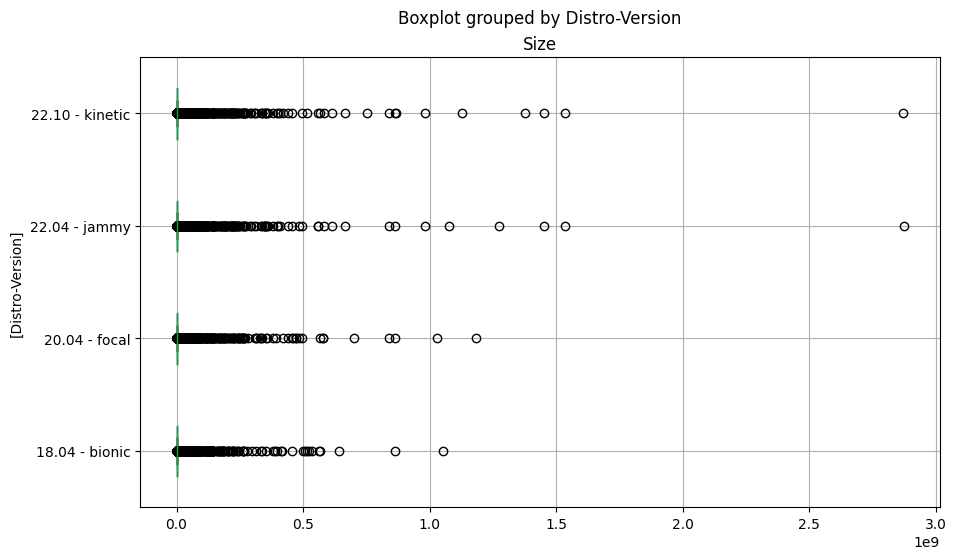

In [20]:
# Seleccionar la columna de "Distro-Version" y "Size"
df = df[["Distro-Version", "Size"]]

# Crear un diagrama de cajas
df.boxplot(by="Distro-Version", figsize=(10, 6), vert=False)

# Mostrar el diagrama
plt.show()